In [1]:
print(__doc__)

import numpy as np
import pandas as pd
from time import time
import xgboost as xgb
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
data = pd.read_csv('D:/Kuliah/TA/DATAGABUNG4.csv', header=None)
dataset = data.values

# split data into X and y

X = dataset[1:,:-1]
Y = dataset[1:,-1]
y = Y.astype(str)

print(data.head())

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_Y = label_encoder.transform(Y)
print (label_encoded_Y)
list(label_encoder.inverse_transform([3]))

seed = 8
test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_Y, test_size=test_size, random_state=seed)

# build a classifier
clf = xgb.XGBClassifier()


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 150, 200, 250, 300],
               "scale_pos_weight " : [1, 10, 25, 50, 75, 99, 100, 1000]}

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search , scoring = "f1_micro", verbose = 3)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
# param_grid = {"learning_rate": [0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#                "max_depth": [2, 4, 7, 10],
#                "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
#                "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
#                "reg_alpha": [0, 0.5, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 150, 200, 250, 300],
#                  "scale_pos_weight " : [1, 10, 25, 50, 75, 99, 100, 1000]}

# # run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid)
# start = time()
# grid_search.fit(X_train, y_train)

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(grid_search.cv_results_['params'])))
# report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
        0          1          2           3
0  Normal  Signature  Dangerous       Jenis
1       3          0          4  Trojan-SMS
2       3          0          5  Trojan-SMS
3       5          2          6    RiskTool
4      11          3         10    RiskTool
[6 6 2 ... 0 0 0]
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.4, scale_pos_weight =25, reg_lambda=2, reg_alpha=1, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

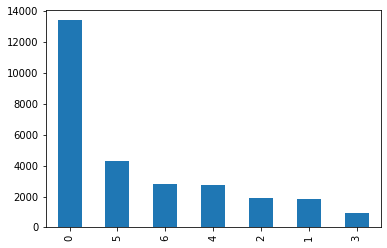

In [9]:
pd.Series(y_train).value_counts().plot.bar()

In [36]:
#untuk bagian balencing

print(__doc__)

import numpy as np
import pandas as pd
from time import time
import xgboost as xgb
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
data = pd.read_csv('D:/Kuliah/TA/DATAGABUNG4.csv', header=None)
dataset = data.values

# split data into X and y

X = dataset[1:,:-1]
Y = dataset[1:,-1]
y = Y.astype(str)

print(data.head())

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_Y = label_encoder.transform(Y)
print (label_encoded_Y)
list(label_encoder.inverse_transform([3]))

seed = 8
test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_Y, test_size=test_size, random_state=seed)

sm = SMOTE(random_state = 1000)

X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train, y_train.ravel())

# build a classifier
clf = xgb.XGBClassifier()


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 150, 200, 250, 300],
               "scale_pos_weight " : [1, 10, 25, 50, 75, 99, 100, 1000]}

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search , scoring = "f1_micro", verbose = 3 )

start = time()
random_search.fit(X_train_SMOTE, y_train_SMOTE)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
# param_grid = {"learning_rate": [0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#                "max_depth": [2, 4, 7, 10],
#                "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
#                "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
#                "reg_alpha": [0, 0.5, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 150, 200, 250, 300],
#                  "scale_pos_weight " : [1, 10, 25, 50, 75, 99, 100, 1000]}

# # run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid)
# start = time()
# grid_search.fit(X_train, y_train)

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(grid_search.cv_results_['params'])))
# report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
        0          1          2           3
0  Normal  Signature  Dangerous       Jenis
1       3          0          4  Trojan-SMS
2       3          0          5  Trojan-SMS
3       5          2          6    RiskTool
4      11          3         10    RiskTool
[6 6 2 ... 0 0 0]
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.4, scale_pos_weight =1000, reg_lambda=2, reg_alpha=0, n_estimators=250, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from joblib import dump
from joblib import load
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz

In [ ]:
#fit model no training data with default parameters
model = XGBClassifier(
    scale_pos_weight = 100,
    subsample= 0.5,
    reg_lambda= 4.5,
    reg_alpha= 0.5,
    n_estimators= 200,
    min_child_weight= 7,
    max_depth= 10, 
    learning_rate= 0.001, 
    gamma= 0.01, 
    colsample_bytree= 1,
                     )
model.fit(X_train, y_train)
#save model
# dump(model, "D:/Kuliah/TA/TA_model.sav")
print(model)
# make predictions for test data
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions ,average='weighted')
print('Precision: %.2f%%' % (precision * 100.0))
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='weighted')
print('Recall: %.2f%%' % (recall * 100.0))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='weighted')
print('F1 score: %.2f%%' % (f1 * 100.0))


In [ ]:

import os
gvz = xgb.to_graphviz(model, num_trees=0, rankdir='LR')
_, file_extension = os.path.splitext('xgboost_model_tree_LR.png')
format = file_extension.strip('.').lower()
data = gvz.pipe(format=format)
full_filename = 'xgboost_model_tree_LR.png'
with open(full_filename, 'wb') as f:
    f.write(data)